In [14]:
import numpy as np
import einops
Nx = 80
Ny = 10
n_particles = Nx*Ny
x = np.zeros((n_particles, 2))
E = np.arange(n_particles)

for i in range(Nx):
    for j in range(Ny):
        x[j*Nx+i] = [(i)/(Nx) * 0.8 + 0.1, (j)/(Ny) * 0.1 + 0.3]

for i in range(n_particles):
    col = i % Nx

    E[i] = 9000 + 2000 * (col / Nx)



In [61]:
n_blocks_x = 16
n_blocks_y = 2
n_blocks = n_blocks_x * n_blocks_y
E_true = np.arange(n_blocks)

x_rs = einops.rearrange(x, "(y x) d -> x y d", y=Ny, d=2)

block_nx = int(Nx / n_blocks_x)
block_ny = int(Ny / n_blocks_y)

for i in range(Nx):
    for j in range(Ny):
        block_index_x = i // block_nx
        block_index_y = j // block_ny
        E[j*Nx+i] = E_true[block_index_x + block_index_y * n_blocks_x]


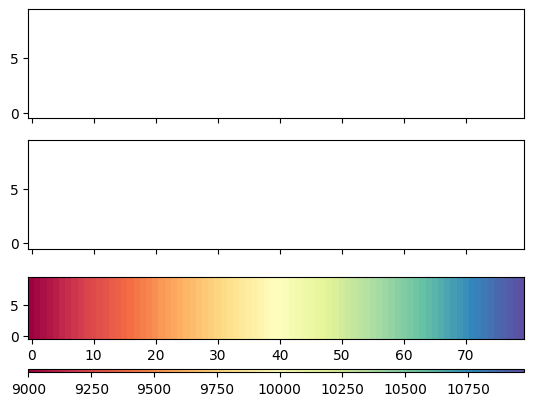

9000

In [15]:
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable

E_reshape = einops.rearrange(E, "(y x) -> x y", y=Ny)


fig, axs = plt.subplots(3, sharex=True, sharey=True)
im2 = axs[2].imshow(E_reshape.transpose(), origin='lower', cmap="Spectral")
divider2 = make_axes_locatable(axs[2])
cax2 = divider2.append_axes("bottom", size="5%", pad=0.3)
fig.colorbar(im2, cax=cax2, orientation='horizontal')
plt.show()
E_reshape.min()

In [4]:
import taichi as ti
import numpy as np
import matplotlib.pyplot as plt
import json 

ti.reset()
real = ti.f32
ti.init(arch=ti.cuda, default_fp=real, device_memory_GB=12)

Nx = 80  # reduce to 30 if run out of GPU memory
Ny = 10
n_particles = Nx * Ny

dim=2
max_steps = 1024

x = ti.Vector.field(dim,
                    dtype=real,
                    shape=(max_steps, n_particles),
                    needs_grad=True)


for i in range(Nx):
    for j in range(Ny):
        x[0, j * Nx + i] = [(i)/(Nx) * 0.8 + 0.1, (j)/(Ny) * 0.1 + 0.3]


[Taichi] version 1.7.0, llvm 15.0.1, commit 2fd24490, win, python 3.10.13
[Taichi] Starting on arch=cuda


In [22]:
strain = np.load("strain2_true.npy")
strain2 = np.load("strain2_true2.npy")

((strain-strain2)**2).sum()

1.9491301e-05